# Exercice sur le taux de chômage aux Etats-Unis



Installation des packages

In [31]:
#install.packages("data.table")
#install.packages('ggplot2')
#install.packages('urca')
#install.packages('lmtest')
#install.packages('sandwich')
#sessionInfo()
#install.packages("https://git.nomics.world/dbnomics/rdbnomics")
#remotes::install_github("dbnomics/rdbnomics", build_vignettes = TRUE, force = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importation et visualisation des données

On importe les données trimestrielles du taux de chômage aux Etats-Unis du 1994:T1 au 23:T1 (117 observations) à partir du site [DB.nomics](https://db.nomics.world/BLS ). Les données proviennent du [Bureau of Labor Statistics](https://www.bls.gov/). On les importe en utilisant leur identifiant ids.


In [10]:
library(data.table)
library(rdbnomics)

df<-rdb(ids = "BLS/ln/LNS13327708Q")
str(df)

Classes ‘data.table’ and 'data.frame':	118 obs. of  79 variables:
 $ @frequency     : chr  "quarterly" "quarterly" "quarterly" "quarterly" ...
 $ absn           : chr  "0" "0" "0" "0" ...
 $ Absn           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ activity       : chr  "0" "0" "0" "0" ...
 $ Activity       : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ ages           : chr  "00" "00" "00" "00" ...
 $ Ages           : chr  "16 years and over" "16 years and over" "16 years and over" "16 years and over" ...
 $ born           : chr  "00" "00" "00" "00" ...
 $ Born           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ cert           : chr  "00" "00" "00" "00" ...
 $ Cert           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ chld           : chr  "00" "00" "00" "00" ...
 $ Chld           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ class          : chr  "00" "00" "00" "00" ...
 $ Class          : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ dataset_code   : chr  "ln" "ln" "ln" "ln" ...
 $ dataset_name   : chr  "Labor Force Statisti

On crée un dataframe contenant uniquement les dates (colonne "period") et la série du taux de chômage (colonne "value").

In [11]:
df_u<-df[,c("period","value")]
colnames(df_u)<-c('date','taux')

In [12]:
head(df_us)

Date,taux
<date>,<dbl>
1994-01-01,7.9
1994-04-01,7.4
1994-07-01,7.3
1994-10-01,6.8
1995-01-01,6.6
1995-04-01,6.8


In [13]:
tail(df_us)

Date,taux
<date>,<dbl>
2022-01-01,4.7
2022-04-01,4.5
2022-07-01,4.4
2022-10-01,4.4
2023-01-01,4.3
2023-04-01,4.4


### Représentation graphique

Le taux de chômage aux Etats-Unis fluctue autour de 6% du début de l'échantillon jusqu'à l'année 2008 à partir de laquelle il augmente très rapidement jusqu'au niveau de 11%, sous l'effet de la crise des subprimes. On observe aussi l'épisode de la crise du Covid avec une hausse instantanée du taux de chômage autour de 14% suivie d'un retour rapide à des niveaux très bas. La période du covid peut avoir un impact sur les résultats des tests statistiques. Au vu du graphique, il est assez difficile de trancher sur la stationnarité du taux de chômage.

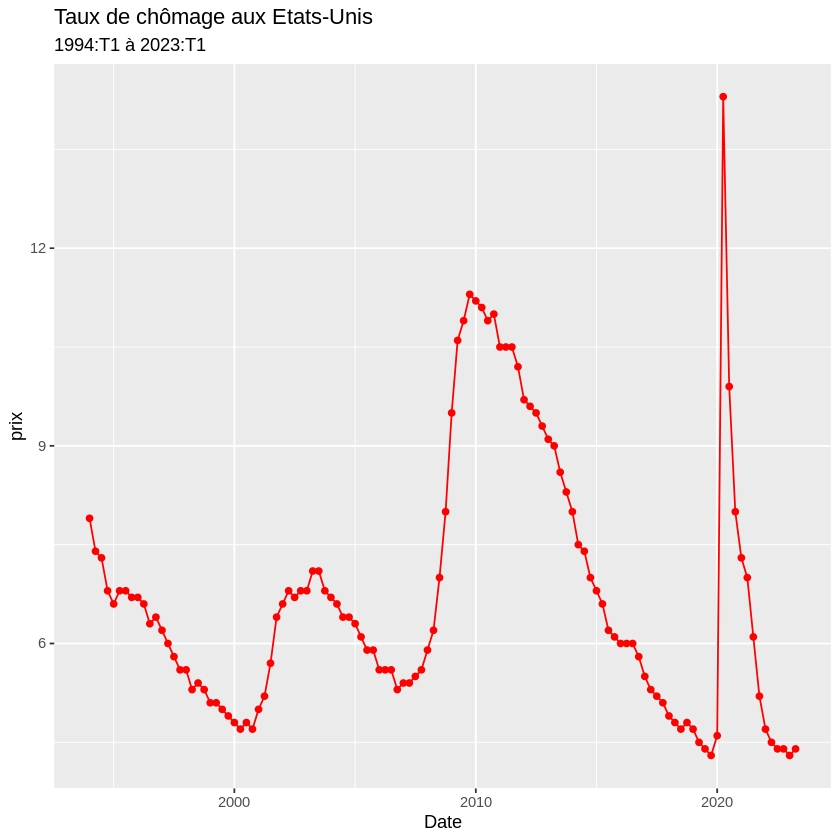

In [17]:
library(ggplot2)
p_us<-ggplot(data=df_u,aes(x=date,y=taux))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Taux de chômage')
p_us+labs(y="prix",title = "Taux de chômage aux Etats-Unis",subtitle = "1994:T1 à 2023:T1")

## Tests sans la période Covid : 1994:T1 à 2019:T4

On exclut les observations à partir du premier trimestre de l'année 2020. Les résultats des tests de racine unitaire et de stationnarité ne sont modifiés. On peut dire aussi qu'ils sont robustes à cette modification de la période de test

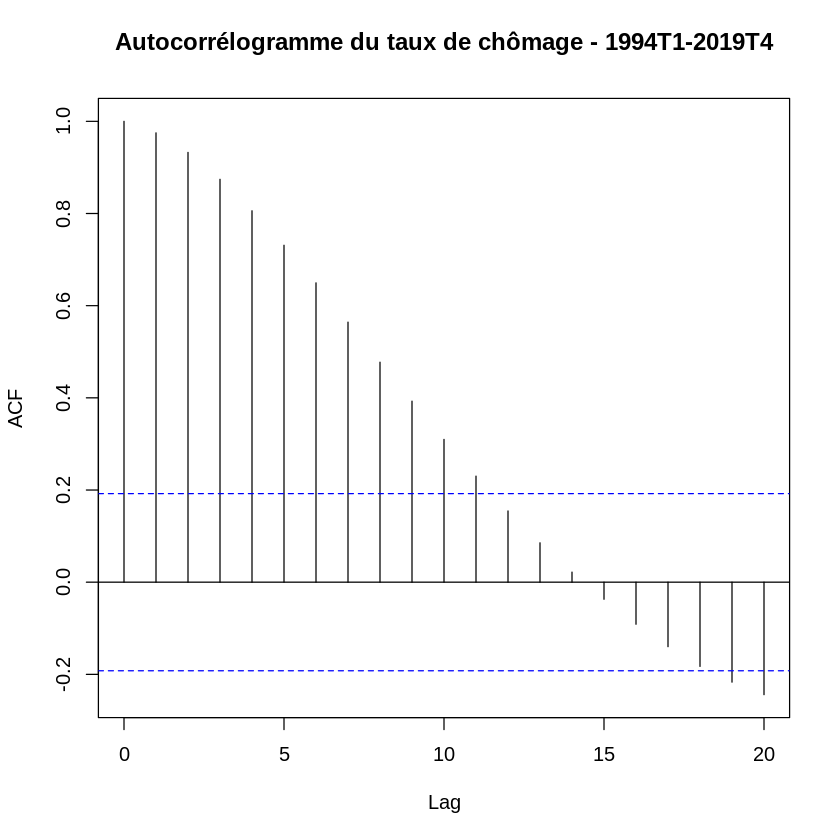

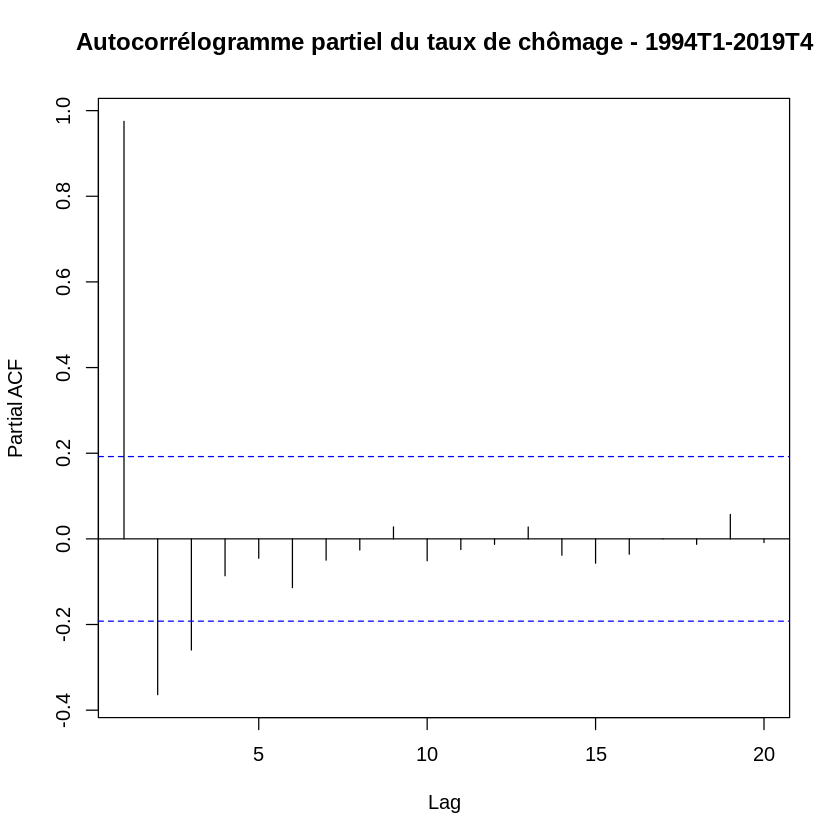

In [18]:
df_u_19T1=df_u[df_u$date<"2020-01-01",]
acf_u_19T1<-acf(x=df_u_19T1$taux,main='Autocorrélogramme du taux de chômage - 1994T1-2019T4')
pacf(x=df_u_19T1$taux,main='Autocorrélogramme partiel du taux de chômage - 1994T1-2019T4')

**Commentaires**

* Les autocorrélations sont positives et significativement jusqu'au retard 11.
* Elles sont proches de 1 pour les retards 1, 2, 3, 4, 5 puis décroissent vers 0. On en déduit que le taux de chômage est assez autocorrélé. Néanmoins, il est assez difficile de tirer une conclusions sur la stationnarité ou non-stationnarité du taux de chômage. le profil des autocorrélations pourrait correspondre à une série stationnaire.
* Les autocorrélations partielles sont significatives pour les retards 1, 2 et 3



###  Test de Dickey-Fuller augmenté

On utilise la librairie [urca](https://cran.r-project.org/web/packages/urca/index.html) pour faire les tests de racine unitaire.



#### Etape 1 : avec constante et tendance déterministe

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [21]:
library(urca)
adf1<-ur.df(y = df_u_19T1$taux,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58183 -0.15778 -0.01373  0.12777  0.79019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.851e-01  9.102e-02   2.034  0.04489 *  
z.lag.1     -2.823e-02  1.267e-02  -2.229  0.02830 *  
tt           5.151e-06  8.597e-04   0.006  0.99523    
z.diff.lag1  5.304e-01  1.001e-01   5.297 8.27e-07 ***
z.diff.lag2  2.748e-01  1.027e-01   2.675  0.00888 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2208 on 90 degrees of freedom
Multiple R-squared:  0.5421,	Adjusted R-squared:  0.5217 
F-statistic: 26.64 on 4 and 90 DF,  p-value: 1.38e-14


Value of test-statistic is: -2.2291 1.7809 2.6281 

Critical values for test st

La statistique du test ADF est égale à  $t_{ADF}=-2.229$. Les seuils de rejet figurent sur la ligne tau3. $t_{ADF}=-2.229>-3.43$ pour un risque de première espèce de 5\%. On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test $t_{ADF}$  est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}} =0.006$. Le seuil de rejet qui figure la table de $t_{\hat{b}}$ est égal à 3.14 pour un risque de première espèce de 5%. on a donc  $\vert t_{\hat{b}} \vert =0.006<3.14$ : on ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative.

On passe au modèle avec une constante uniquement.

#### Etape 2 : avec constante

In [22]:
adf2<-ur.df(y = df_u_19T1$taux,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58173 -0.15769 -0.01349  0.12783  0.79028 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.18530    0.08629   2.147  0.03442 *  
z.lag.1     -0.02822    0.01224  -2.305  0.02342 *  
z.diff.lag1  0.53034    0.09941   5.335 6.94e-07 ***
z.diff.lag2  0.27477    0.10167   2.703  0.00821 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2196 on 91 degrees of freedom
Multiple R-squared:  0.5421,	Adjusted R-squared:  0.527 
F-statistic: 35.91 on 3 and 91 DF,  p-value: 2.097e-15


Value of test-statistic is: -2.3053 2.7011 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.

La statistique du test ADF est égale à  $t_{ADF}=-2.305$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test  
$t_{ADF} > -2.88$ pour le risque de première espèce de 5% est supérieure : on ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèce de 1% et 10%.

Le t-stat de la tendance déterministe est égal à $t_{\hat{c}}=2.147$. Le seuil de rejet qui figure la table de $t_{\hat{b}}$ est égal à 2.86 pour un risque de première espèce de 5%. on a donc  $\vert t_{\hat{c}} \vert =2.147<2.86$ : on ne rejette pas l'hypothèse nulle que la constante n'est pas significative.





#### Etape 3: Sans constante ni tendance déterministe

In [23]:
adf3<-ur.df(y = df_u_19T1$taux,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60506 -0.11761  0.01318  0.13780  0.80067 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.002851   0.003268  -0.872    0.385    
z.diff.lag1  0.540294   0.101231   5.337 6.75e-07 ***
z.diff.lag2  0.227304   0.101163   2.247    0.027 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2238 on 92 degrees of freedom
Multiple R-squared:  0.5219,	Adjusted R-squared:  0.5063 
F-statistic: 33.48 on 3 and 92 DF,  p-value: 1.018e-14


Value of test-statistic is: -0.8723 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


La statistique du test ADF est égale à  $t_{ADF}=-0.872$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test  
$t_{ADF}=-0.872>-1.95$  est supérieure au seuil de rejet pour le risque de première espèce de 5% :  on ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèces de 1% et 10%.



#### Conclusion sur les résultats de tests ADF





A l'issus de la séquence des tests ADF  on conclut que la série du taux de chômage est un processus DS sans dérive.

### Test de stationnarité de KPSS

On applique le test de KPSS. Dans ce cas l'hypothèse nulle est que la série est stationnaire autour d'une tendance déterministe ou autour d'une constante.

Dans la spécification du test kpss :

* type :  sert à spécifier la forme de la composante déterministe (tau = tendance déterministe, mu = constante),

* lags :  sert à spécifier la façon dont le test va corriger l'autoccorélation les résidus. On choisit l'option "long" qui permet de corriger une autocorrélation importante/



#### Test de stationnarité autour d'une tendance déterministe

In [24]:
kpss_tau<-ur.kpss(y=df_u_19T1$taux,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 12 lags. 

Value of test-statistic is: 0.1184 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test est égale à $LM_{KPSS} = 0.1184$. Le seuil de rejet pour un risque de première espèce est égal à 0.146. On a donc $LM_{KPSS} = 0.1184<0.146$ : on ne rejette pas l'hypothèse de stationnarité autour d'une tendance déterministe. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 1% et 10%.





#### Test de stationnarité autour d'une constante

In [27]:
kpss_mu<-ur.kpss(y=df_u_19T1$taux,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 0.1511 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test est égale à $LM_{KPSS} = 0.1511$. Le seuil de rejet pour un risque de première espèce est égal à 0.463. On a donc $LM_{KPSS} = 0.1511<0.463$ : on ne rejette pas l'hypothèse de stationnarité avec une constante. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 1% et 10%.

La représentation graphique suggère que le taux de chômage ne contient pas de tendance déterministe. De plus, Si l'on fait la régression par les MCO
du taux de chômage sur une tendance déterministe, le coefficient de la tendance déterministe n'est pas significative

In [32]:
# Regression MOC standard
model<-lm(df_u_19T1$taux~seq_along(df_u_19T1$taux))
summary(model)

# Estimation des écart type robustes à l'heteroscedasticité et l'autocorrélation
library(lmtest)
library(sandwich)
coeftest(model,vcov. = vcovHAC(model,type="HAC"))


Call:
lm(formula = df_u_19T1$taux ~ seq_along(df_u_19T1$taux))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8753 -1.2823 -0.2971  0.4594  4.4408 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.353361   0.363798  17.464   <2e-16 ***
seq_along(df_u_19T1$taux) 0.007903   0.006015   1.314    0.192    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.842 on 102 degrees of freedom
Multiple R-squared:  0.01664,	Adjusted R-squared:  0.007 
F-statistic: 1.726 on 1 and 102 DF,  p-value: 0.1919



t test of coefficients:

                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.353361   0.415171  15.303   <2e-16 ***
seq_along(df_u_19T1$taux) 0.007903   0.008007   0.987    0.326    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Conclusion générale sur les test de racine unitaire et de stationnarité



On voit que les conclusions des tests ADF et KPSS sont contradictoires en ce qui concerne la stationnarité du taux de chômage. Des études empiriques sur le taux de chômage aux Etats-Unis conclut à la stationnarité du taux de chômage (Nelson and Plosser, 1982, Perron, 1988, Xiao and Phillips, 1997). On reviendra sur cette question lors l'étude de la modélisation du taux de chômage par un modèle ARMA (chapitre III).



## Tests sur la période 1994:T1 à 2023:T1



On ajoute maintenant la période du covid qui se caractérise par une explosion temporaire du taux de chômage à des niveaux sans précédent dans l'échantillon. En fin de période, le taux de chômage est revenu à des niveaux comparables à ceux observés avant le covid. L'objectif est voir dans quelle mesure l'inclusion de cette période peut avoir un effet sur les tests de racine unitaire et de stationnarité.



### Autocorrélogramme

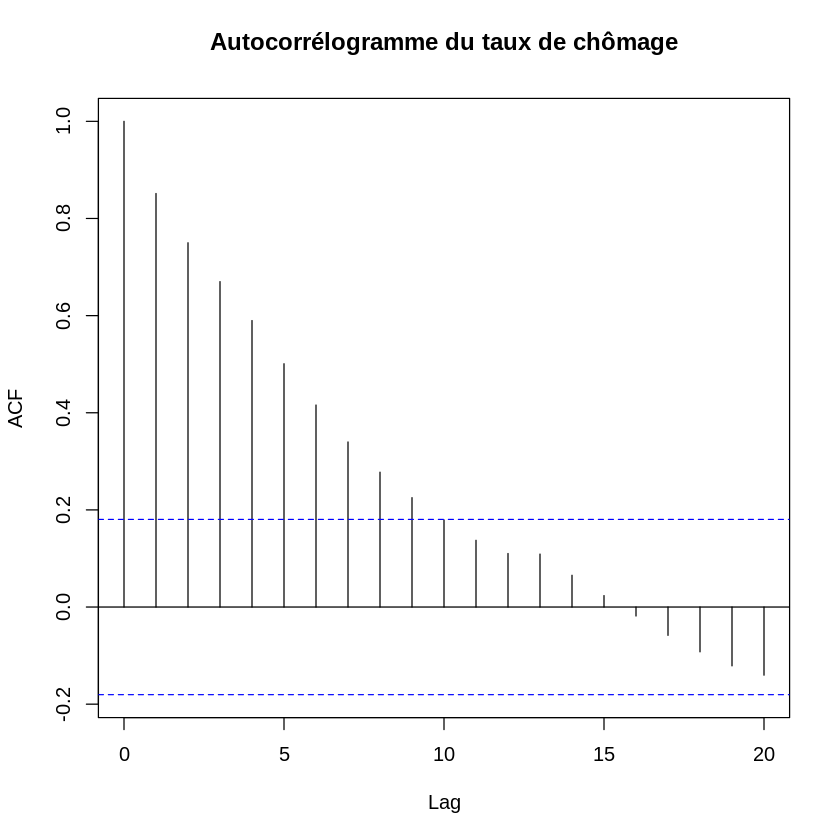

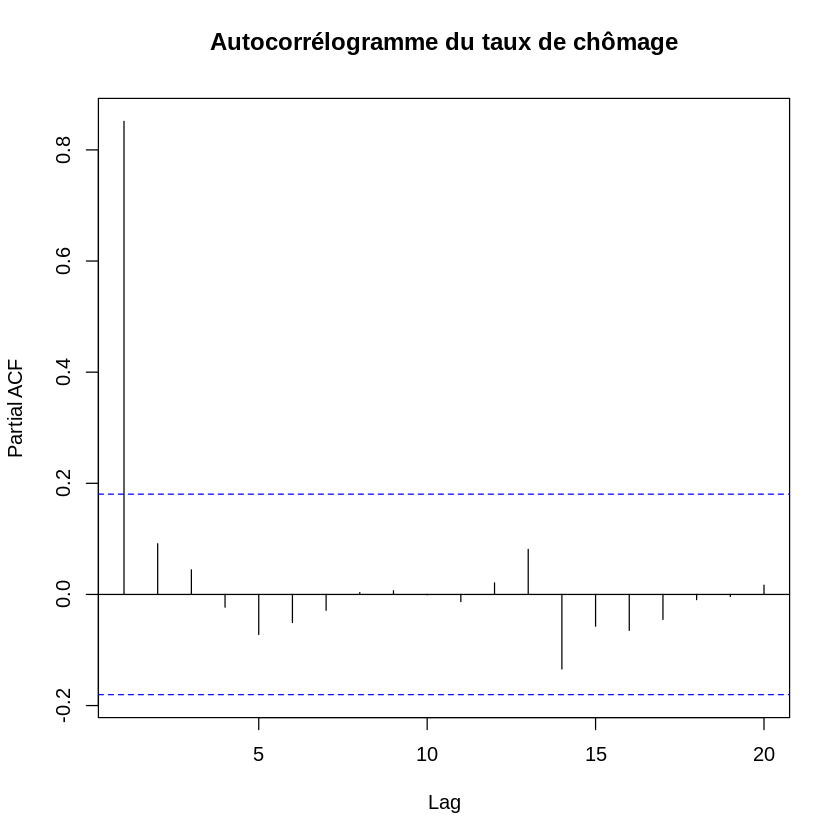

In [33]:
acf_us_rate<-acf(x=df_u$taux,main='Autocorrélogramme du taux de chômage')
pacf_us_rate<-pacf(x=df_u$taux,main='Autocorrélogramme du taux de chômage')

**Commentaires**
* Pas de changement majeur de l'autocorrélogramme.
* Aucune autocorrélation partielle n'est significative




### Test de Dickey-Fuller augmenté


#### Etape 1 : avec constante et tendance déterministe

In [34]:
library(urca)
adf1<-ur.df(y = df_u$taux,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4246 -0.3135 -0.1312  0.0857  9.5244 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.8247025  0.4032732   2.045   0.0434 *
z.lag.1     -0.1206021  0.0525214  -2.296   0.0236 *
tt          -0.0006008  0.0032668  -0.184   0.8544  
z.diff.lag  -0.1043086  0.0979169  -1.065   0.2892  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.067 on 105 degrees of freedom
Multiple R-squared:  0.07579,	Adjusted R-squared:  0.04939 
F-statistic:  2.87 on 3 and 105 DF,  p-value: 0.03993


Value of test-statistic is: -2.2962 1.8372 2.7264 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75

La statistique du test ADF est égale à $t_{ADF}=-2.296$ . Les seuils de rejet figurent sur la ligne tau3. La statistique de test  
 est supérieure aux seuils de rejet pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}}=-0.184$. Le seuil de rejet qui figure la table de est égal à 3.14 pour un risque de première espèce de 5%. on a donc   : on ne peut rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative.



#### Etape 2 : avec constante

In [35]:
adf2<-ur.df(y = df_u$taux,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4540 -0.3013 -0.1324  0.1007  9.4967 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.79360    0.36444   2.178   0.0317 *
z.lag.1     -0.12160    0.05200  -2.339   0.0212 *
z.diff.lag  -0.10316    0.09727  -1.061   0.2913  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.062 on 106 degrees of freedom
Multiple R-squared:  0.0755,	Adjusted R-squared:  0.05805 
F-statistic: 4.328 on 2 and 106 DF,  p-value: 0.0156


Value of test-statistic is: -2.3385 2.764 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


La statistique du test ADF est égale à $t_{ADF}=-2.296$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test  
$t_{ADF}$  est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{c}} =2.170$. Le seuil de rejet qui figure la table de $t_{\hat{b}}$ est égal à 2.86 pour un risque de première espèce de 5%. on a donc  $\vert t_{\hat{c}} \vert =2.170<2.86$ : on ne peut rejeter l'hypothèse nulle que la constante n'est pas significative.



#### Etape 3 : sans constante ni tendance déterministe

In [ ]:
adf3<-ur.df(y = df_u$taux,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

La statistique du test ADF est égale à  $t_{ADF}=-0.871$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test  
$t_{ADF}$  est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.



### Conclusion

Les résultats des tests ADF nous amènent à conclure que la série du taux de chômage est une série DS sans tendance ni constante. Les conclusions des tests ADF ne sont pas modifiés par la période du covid.



### Test de stationnarité de KPSS¶




#### Stationnarité autour d'une tendance déterministe

In [37]:
kpss_tau<-ur.kpss(y=df_u$taux,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 12 lags. 

Value of test-statistic is: 0.129 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test KPSS avec une constante est égale à $LM_{KPSS}=0.129$. Elle est inférieure au seuil de rejet à 5% : 0.129<0.146 (et aussi à celle à 1%). On ne peut donc pas rejeter l'hypothèse de stationnarité du taux de chômage avec une tendance déterministe.




#### Stationnarité autour d'une constante

In [ ]:
kpss_mu<-ur.kpss(y=df_u$taux,type="mu",lags="long")
summary(kpss_mu)

La statistique du test KPSS avec une constante est égale à $LM_{KPSS}=0.136$. Elle est inférieure au seuil de rejet à 5% : 0.136<0.436 (et aussi à celle à 1%). On ne peut donc pas rejeter l'hypothèse de stationnarité du taux de chômage autour d'une constante.



#### Absence de tendance déterministe


Pas plus que précédemment, si l'on régresse le taux de chômage sur une constante et une tendance déterministe linéaire, le coefficient de cette dernière variable n'est pas significativement différent de 0.

In [36]:
library(lmtest)
model2<-lm(df_u$taux~seq_along(df_u$taux)) # Regression OLS standard
summary(model2)

coeftest(model2,vcov. = vcovHAC(model2,type="HAC")) # Estimation des écart type robuste à l'heteroscedasticité et l'autocorrélation


Call:
lm(formula = df_u$taux ~ seq_along(df_u$taux))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5640 -1.3816 -0.3941  0.5797  7.4635 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.571664   0.368587  17.829   <2e-16 ***
seq_along(df_u$taux) 0.002499   0.005376   0.465    0.643    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.989 on 116 degrees of freedom
Multiple R-squared:  0.001859,	Adjusted R-squared:  -0.006746 
F-statistic: 0.216 on 1 and 116 DF,  p-value: 0.643



t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.5716645  0.6666703  9.8574   <2e-16 ***
seq_along(df_u$taux) 0.0024987  0.0106114  0.2355   0.8143    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Conclusion générale



* L'application des tests de racine unitaire ADF et des tests de stationarité KPSS nous donne des résultats contradictoires.

* Ces résultats ne sont pas modifiés par l'ajout de la période covid.

*  En s'appuyant sur les travaux empiriques précédents, on décide de considérer le taux de chômage comme une variable stationnaire et de donc de ne pas le différencier.